**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Production economy and CO2 taxation](#toc1_)    
- 2. [Problem 2: Career choice model](#toc2_)    
- 3. [Problem 3: Barycentric interpolation](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
from types import SimpleNamespace
import numpy as np
from scipy.optimize import minimize
import pandas as pd

## 1. <a id='toc1_'></a>[Problem 1: Production economy and CO2 taxation](#toc0_)

**Question 1:** Check market clearing conditions for $p_1$ in `linspace(0.1,2.0,10)` and $p_2$ in `linspace(0.1,2.0,10)`. We choose $w=1$ as numeraire.

In [2]:
from examp1 import ProductionEconomyClass

# Initiate the model
model = ProductionEconomyClass()


In [3]:
# Define ranges for p1 and p2
p1_values = np.linspace(0.1, 2.0, 10)
p2_values = np.linspace(0.1, 2.0, 10)

# Initialize lists to store results
results = []

# Compute excess demands for each combination of p1 and p2
for p1 in p1_values:
    for p2 in p2_values:
        excess_labor = model.excessdemand_labor(p1, p2)
        excess_goodsmarket1 = model.excessdemand_goodmarket1(p1, p2)
        excess_goodsmarket2 = model.excessdemand_goodmarket2(p1, p2)
        results.append((p1, p2, excess_labor, excess_goodsmarket1, excess_goodsmarket2))

# Create a DataFrame for better readability
df_results = pd.DataFrame(results, columns=['p1', 'p2', 'Excess Labor', 'Excess Goods Market 1', 'Excess Goods Market 2'])

# Display the DataFrame
pd.set_option('display.float_format', lambda x: '%.4f' % x)
print(df_results)

# Find the indices where the sign changes
sign_changes = df_results['Excess Goods Market 1'].apply(np.sign).diff().ne(0)

# Filter the indices where the sign changes (excluding the first row, as diff() makes the first value NaN)
sign_change_indices = df_results[sign_changes].index[1:]

print("Indices where sign changes:", sign_change_indices)
print("Values at these indices:")
print(df_results.loc[sign_change_indices])


       p1     p2  Excess Labor  Excess Goods Market 1  Excess Goods Market 2
0  0.1000 0.1000       -0.9934                 2.9601                 6.9735
1  0.1000 0.3111       -0.9645                 3.0037                 2.1347
2  0.1000 0.5222       -0.9063                 3.0930                 1.1432
3  0.1000 0.7333       -0.8195                 3.2302                 0.6770
4  0.1000 0.9444       -0.7047                 3.4171                 0.3844
..    ...    ...           ...                    ...                    ...
95 2.0000 1.1556        0.6328                -0.6948                 0.6549
96 2.0000 1.3667        0.7853                -0.6777                 0.4171
97 2.0000 1.5778        0.9607                -0.6574                 0.2244
98 2.0000 1.7889        1.1601                -0.6340                 0.0603
99 2.0000 2.0000        1.3820                -0.6073                -0.0837

[100 rows x 5 columns]
Indices where sign changes: Index([40, 46, 50], dtyp

**Question 2:** Find the equilibrium prices $p_1$ and $p_2$.<br>
*Hint: you can use Walras' law to only check 2 of the market clearings*

In [4]:
# List initial guesses in the space to see which would be best
initial_guesses = [
    [0.5, 0.5],
    [1, 1],
    [1.5, 1.5],
    [0.1, 0.1],
    [2.0, 2.0]
]

best_result = None
best_objective_value = np.inf
best_initial_guess = None

# Try initial guesses and find the best result with lowest objective value
for initial_guess in initial_guesses:
    result = minimize(model.objectiveprice, initial_guess, bounds=[(0.1, 2.0), (0.1, 2.0)])
    if result.fun < best_objective_value:
        best_result = result
        best_objective_value = result.fun
        best_initial_guess = initial_guess

equilibrium_p1, equilibrium_p2 = best_result.x

# Print results for equilibrium prices and the initial guess that gave the best result
print(f"Equilibrium p1: {equilibrium_p1:.4f}, Equilibrium p2: {equilibrium_p2:.4f}")
print(f"Best initial guess: {best_initial_guess}")

Equilibrium p1: 0.9762, Equilibrium p2: 1.4912
Best initial guess: [2.0, 2.0]


**Question 3:** What values of $\tau$ and (implied) $T$ should the government choose to maximize $SWF$?

In [5]:
p1 = equilibrium_p1
p2 = equilibrium_p2

tau_optimal = model.optimize_tau(p1, p2)
T_optimal = tau_optimal * model.c23(p1, p2, tau_optimal, 0, model.l_star_consumer(p1, p2))

print("Optimal tau:", tau_optimal)
print("Implied T:", T_optimal)

Optimal tau: 0.1
Implied T: 0.06987439862863795


## 2. <a id='toc2_'></a>[Problem 2: Career choice model](#toc0_)

**Question 1:** Simulate and calculate expected utility and the average realised utility for $K=10000$ draws, for each career choice $j$.


In [6]:
#Set parameters
par = SimpleNamespace()
par.J = 3
par.N = 10
par.K = 10000
par.F = np.arange(1,par.N+1)
par.sigma = 2
par.v = np.array([1,2,3])
par.c = 1

In [7]:
# Set a seed
np.random.seed(80)

In [8]:
# Initialize arrays to store expected- and average realized utilities
expected_utilities = np.zeros(par.J)
avg_realized_utilities = np.zeros((par.N, par.J))

# For each career choice j
for j in range(par.J):
    # Epsilon is drawn from a normal distribution
    epsilon = np.random.normal(0, par.sigma, (par.N, par.K))
    #Calculate ex post utility
    utilities = par.v[j] + epsilon
    #Calculate expected utility
    expected_utilities[j] = par.v[j] + np.mean(epsilon)
    #Calculate average realized utilities across all simulations for each graduate 
    avg_realized_utilities[:, j] = np.mean(utilities, axis=1)

In [9]:
# Convert to DataFrame for better visualization
expected_utilities_df = pd.DataFrame(expected_utilities, columns=['Expected Utility'], index=[f'Career {j+1}' for j in range(par.J)])
avg_realized_utilities_df = pd.DataFrame(avg_realized_utilities, columns=[f'Realized Utility Career {j+1}' for j in range(par.J)], index=[f'Graduate {i+1}' for i in range(par.N)])

# Print the expected and realized utilities
print("Expected Utilities:")
print(expected_utilities_df)

print("\nRealized Utilities:")
print(avg_realized_utilities_df)

Expected Utilities:
          Expected Utility
Career 1            0.9888
Career 2            2.0090
Career 3            2.9951

Realized Utilities:
             Realized Utility Career 1  Realized Utility Career 2  \
Graduate 1                      0.9979                     2.0131   
Graduate 2                      0.9680                     2.0041   
Graduate 3                      0.9968                     2.0439   
Graduate 4                      1.0021                     2.0201   
Graduate 5                      0.9833                     2.0099   
Graduate 6                      0.9735                     1.9993   
Graduate 7                      1.0141                     1.9943   
Graduate 8                      0.9790                     1.9971   
Graduate 9                      0.9738                     2.0197   
Graduate 10                     0.9997                     1.9885   

             Realized Utility Career 3  
Graduate 1                      2.9892  
Graduate 

**Question 2:** Simulate and visualize: For each type of graduate, $i$, the share of graduates choosing each career, the average subjective expected utility of the graduates, and the average ex post realized utility given their choice.

Step 1: For each individual draw J*Fi, and calculate the prior expected utility of each career track

In [10]:
# Initialize array to store the drawn values
drawn_values = {}


# Simulate drawing J * F_i values for each person i
for i in range(par.N):
    #Determine the number of sample for the graduate
    Fi = par.F[i]
    #Generate epsilon 
    epsilon_fj = np.random.normal(0, par.sigma, (par.J, Fi, par.K))
    #Store the drawn values in the dictionary
    drawn_values[f'Graduate {i+1}'] = epsilon_fj



# Initialize array to store the prior expected utilities
prior_expected_utilities = np.zeros((par.N, par.J, par.K))


# For each graduate, i 
for i in range(par.N):
    Fi = par.F[i]
    epsilon_fj = drawn_values[f'Graduate {i+1}']
    
    # For each career track, j
    for j in range(par.J):
        #For each simulation, k
        for k in range(par.K):
            #Calculate the prior expected utilities
            prior_expected_utilities[i, j, k] = np.mean(par.v[j] + epsilon_fj[j, :, k])



# We can visualize the average prior expected utility over all simulations for simplicity
average_prior_expected_utilities = np.mean(prior_expected_utilities, axis=2)
prior_expected_utilities_df = pd.DataFrame(average_prior_expected_utilities, columns=[f'Career {j+1}' for j in range(par.J)], index=[f'Graduate {i+1}' for i in range(par.N)])



# Print the average prior expected utilities
print("Average Prior Expected Utilities:")
print(prior_expected_utilities_df)


Average Prior Expected Utilities:
             Career 1  Career 2  Career 3
Graduate 1     1.0376    1.9834    2.9897
Graduate 2     1.0093    1.9841    3.0060
Graduate 3     0.9902    2.0049    3.0096
Graduate 4     1.0135    1.9811    3.0117
Graduate 5     0.9981    2.0113    2.9934
Graduate 6     0.9998    1.9861    2.9930
Graduate 7     1.0088    2.0020    2.9988
Graduate 8     0.9818    1.9974    3.0068
Graduate 9     1.0040    2.0003    2.9978
Graduate 10    0.9973    1.9987    3.0081


Step 2: For each individual find the career with the highest expected utility

In [11]:
# Initialize array to store the chosen careers, ensuring it's 2-dimensional
chosen_careers = np.zeros((par.N, par.K), dtype=int)

# Iterates over each individual
for i in range(par.N):
    #Iterates over each career track for the given individual
    for k in range(par.K):
        # Finding the highest expected utilities
        chosen_career = np.argmax(prior_expected_utilities[i, :, k]) + 1  # Adding 1 to shift the index
        chosen_careers[i, k] = chosen_career

# Convert the chosen careers to DataFrame for visualization
chosen_careers_df = pd.DataFrame(chosen_careers, columns=[f'Simulation {k+1}' for k in range(par.K)], index=[f'Graduate {i+1}' for i in range(par.N)])

# Print a sample of chosen careers
print("\nSample Chosen Careers:")
print(chosen_careers_df.head())


Sample Chosen Careers:
            Simulation 1  Simulation 2  Simulation 3  Simulation 4  \
Graduate 1             3             3             3             3   
Graduate 2             3             3             3             2   
Graduate 3             3             2             3             3   
Graduate 4             2             2             3             2   
Graduate 5             2             3             3             3   

            Simulation 5  Simulation 6  Simulation 7  Simulation 8  \
Graduate 1             1             3             3             2   
Graduate 2             1             3             2             2   
Graduate 3             3             3             2             3   
Graduate 4             3             2             2             3   
Graduate 5             3             3             3             3   

            Simulation 9  Simulation 10  ...  Simulation 9991  \
Graduate 1             2              3  ...                2   
Grad

Step 3: Prior expectation of the value of their chosen career

In [12]:
#Store the prior expectation of the value of their chosen career
optimal_prior_expected_utilities = np.zeros((par.N, par.K))

#Iterates over each individual
for i in range(par.N):
    #Iterates over each career track
    for k in range(par.K):
        #Assume the individual choose the optimal career track
        optimal_career = chosen_careers[i, k] - 1  # Convert to 0-index
        optimal_prior_expected_utilities[i, k] = prior_expected_utilities[i, optimal_career, k]

# Convert to DataFrame for better visualization
optimal_prior_expected_utilities_df = pd.DataFrame(optimal_prior_expected_utilities, columns=[f'Simulation {k+1}' for k in range(par.K)], index=[f'Graduate {i+1}' for i in range(par.N)])
print("\nOptimal Prior Expected Utilities:")
print(optimal_prior_expected_utilities_df.head())


Optimal Prior Expected Utilities:
            Simulation 1  Simulation 2  Simulation 3  Simulation 4  \
Graduate 1        5.5926        4.8455        5.7438        4.6932   
Graduate 2        1.6926        2.1020        3.6147        3.1754   
Graduate 3        4.5757        2.7960        3.6606        2.7585   
Graduate 4        4.9084        2.5718        4.4509        2.2680   
Graduate 5        2.5413        3.0399        3.6940        3.5236   

            Simulation 5  Simulation 6  Simulation 7  Simulation 8  \
Graduate 1        1.7770        3.2503        5.8784        5.6439   
Graduate 2        2.9965        3.3574        1.9170        3.7654   
Graduate 3        1.8210        3.6058        2.9994        3.5257   
Graduate 4        3.4359        2.0058        3.8855        3.9037   
Graduate 5        3.6430        2.5437        3.2379        1.8582   

            Simulation 9  Simulation 10  ...  Simulation 9991  \
Graduate 1        2.8394         2.3016  ...           2.7

Step 3: Realized value of their chosen career track

In [13]:
# Initialize the array to store the realized values
optimal_realized_values = np.zeros((par.N, par.K))

# Iterates over each individual
for i in range(par.N):
    #Iterates over each career track
    for k in range(par.K):
        # Retrieve the 1-indexed chosen career and convert to 0-index for array access
        career_index = chosen_careers[i, k] - 1
        # Compute the realized value
        noise = np.random.normal(0, par.sigma)
        optimal_realized_values[i, k] = par.v[career_index] + noise


# Convert chosen careers and realized values to DataFrame for visualization
optimal_realized_values_df = pd.DataFrame(optimal_realized_values, columns=[f'Simulation {k+1}' for k in range(par.K)], index=[f'Graduate {i+1}' for i in range(par.N)])

# Print the results
print("\nRealized Values for Chosen Careers:")
print(optimal_realized_values_df.head())


Realized Values for Chosen Careers:
            Simulation 1  Simulation 2  Simulation 3  Simulation 4  \
Graduate 1       -0.8772        1.7852        7.0655        2.3568   
Graduate 2        5.4827        1.2725        2.2129       -1.9577   
Graduate 3        1.3738        6.2870        2.6493        3.3454   
Graduate 4        0.6545        3.2567        5.0492        0.8838   
Graduate 5        2.4080        4.7363        4.2453        3.5754   

            Simulation 5  Simulation 6  Simulation 7  Simulation 8  \
Graduate 1        1.0735        2.4333        1.5182       -1.3051   
Graduate 2       -1.1056        2.6029        3.0872        4.2522   
Graduate 3        0.9916        0.6509        1.8752        4.9184   
Graduate 4        1.5425        4.1238        1.3017        5.4126   
Graduate 5        6.9095        3.2572        0.5810        3.0201   

            Simulation 9  Simulation 10  ...  Simulation 9991  \
Graduate 1        0.9402         3.7059  ...           2

Share of graduates choosing each career

In [14]:
# Initialize the DataFrame to hold the proportions of chosen careers for each graduate
# Specify the data type as float directly at initialization, to avoid future warning.
career_proportions_df = pd.DataFrame(0.0, index=[f'Graduate {i+1}' for i in range(par.N)],
                                     columns=[f'Career {j+1}' for j in range(par.J)])


# Calculate the proportion of choices for each career for each graduate
for i in range(par.N):
    # Extract the careers chosen by each individual graduate across all simulations
    graduate_careers = chosen_careers[i, :]

    # Count occurrences of each career choice for this particular graduate
    career_counts = np.bincount(graduate_careers, minlength=par.J + 1)[1:]  # Ensures correct length and skip index 0

    # Calculate the share for each career for each graduate
    career_proportions = career_counts / par.K

    # Store the results in the DataFrame
    career_proportions_df.loc[f'Graduate {i+1}'] = career_proportions

# Print the DataFrame with the proportions of chosen careers for each graduate
print("\nProportions of Chosen Careers for Each Graduate:")
print(career_proportions_df)


Proportions of Chosen Careers for Each Graduate:
             Career 1  Career 2  Career 3
Graduate 1     0.1580    0.2991    0.5429
Graduate 2     0.0952    0.2668    0.6380
Graduate 3     0.0603    0.2527    0.6870
Graduate 4     0.0511    0.2163    0.7326
Graduate 5     0.0330    0.2101    0.7569
Graduate 6     0.0271    0.1825    0.7904
Graduate 7     0.0182    0.1711    0.8107
Graduate 8     0.0088    0.1540    0.8372
Graduate 9     0.0106    0.1449    0.8445
Graduate 10    0.0070    0.1278    0.8652


The Average Subjecive Expected Utility

In [15]:
# Calculate the average subjective expected utility for each graduate
average_subjective_expected_utilities = np.mean(optimal_prior_expected_utilities, axis=1)  # Average over career tracks

# Convert to DataFrame for visualization
average_subjective_expected_utilities_df = pd.DataFrame(
    average_subjective_expected_utilities, 
    columns=['Average Subjective Expected Utility'], 
    index=[f'Graduate {i+1}' for i in range(par.N)]
)

# Print
print("Average Subjective Expected Utilities:")
print(average_subjective_expected_utilities_df)

Average Subjective Expected Utilities:
             Average Subjective Expected Utility
Graduate 1                                3.8753
Graduate 2                                3.4802
Graduate 3                                3.3233
Graduate 4                                3.2342
Graduate 5                                3.1649
Graduate 6                                3.1234
Graduate 7                                3.1078
Graduate 8                                3.0897
Graduate 9                                3.0713
Graduate 10                               3.0674


The Average Ex Post Realized Utility given their choice of career

In [16]:
# Calculate the average realized utility for each graduate
average_realized_utilities = np.mean(optimal_realized_values, axis=1)

# Convert to DataFrame for better visualization
average_realized_utilities_df = pd.DataFrame(average_realized_utilities, columns=['Average Realized Utility'], index=[f'Graduate {i+1}' for i in range(par.N)])

# Print the results
print("\nAverage Realized Utilities for Each Graduate:")
print(average_realized_utilities_df)


Average Realized Utilities for Each Graduate:
             Average Realized Utility
Graduate 1                     2.3779
Graduate 2                     2.5595
Graduate 3                     2.6070
Graduate 4                     2.7165
Graduate 5                     2.7289
Graduate 6                     2.7456
Graduate 7                     2.8086
Graduate 8                     2.8309
Graduate 9                     2.8224
Graduate 10                    2.8713


From the above it is evident, that a larger proportion chooses Career 3, as i increases.

According to the problem, the first graduate has 1 friend in each career, the second has 2 friends, ... and the tenth has 10 friends. Which means, that the graduates with the highest number, has the most information about the expected value of each career track.

Therefore, the graduates with the highest index will observe that career 3 gives the highest utility, and a larger proportion will therefore choose career track 3.

This is also visible in the average realized utility, where the graduates with the most friends (highest index) also gets the higest average realized utility.

**Question 3:** Following the same approach as in question 2, find the new optimal career choice for each $i$, $k$. Then for each $i$, calculate the average subjective expected utility from their new optimal career choice, and the ex post realized utility of that career. Also, for each $i$, calculate the share of graduates that chooses to switch careers, conditional on which career they chose in the first year. <br>

In [17]:
#Set c = 1
par.c = 1

Step 1: Calculate the prior expected utility of each each carrer track

In [18]:
# Initialize arrays for the second year's expected utilities
second_year_expected_utilities = np.zeros((par.N, par.J, par.K))


# Iterates over each individual 
for i in range(par.N):
    Fi = par.F[i]
    epsilon_fj = drawn_values[f'Graduate {i+1}']  # Retrieve the stored epsilon values

    #Iterates over each career option
    for j in range(par.J):
        for k in range(par.K):
            #Retrieve the chosen career from period 1
            current_career = chosen_careers[i, k] - 1
            if j == current_career:
                # No switching cost if staying in the same career
                second_year_expected_utilities[i, j, k] = optimal_realized_values[i, k]
            else:
                # Apply switching cost if changing careers
                second_year_expected_utilities[i, j, k] = par.v[j] + np.mean(epsilon_fj[j, :, k]) - par.c


# Calculate average utilities over all simulations for simplicity
average_second_year_utilities = np.mean(second_year_expected_utilities, axis=2)
second_year_utilities_df = pd.DataFrame(average_second_year_utilities, columns=[f'Career {j+1}' for j in range(par.J)], index=[f'Graduate {i+1}' for i in range(par.N)])

# Print the results
print("Prior expected utility of each career track:")
print(second_year_utilities_df)

Prior expected utility of each career track:
             Career 1  Career 2  Career 3
Graduate 1    -0.1822    0.7598    1.9358
Graduate 2    -0.0796    0.9174    2.2409
Graduate 3    -0.0645    0.9846    2.3682
Graduate 4    -0.0161    0.9875    2.5172
Graduate 5    -0.0227    1.0466    2.5428
Graduate 6    -0.0139    1.0183    2.5967
Graduate 7     0.0070    1.0446    2.6587
Graduate 8    -0.0225    1.0375    2.7122
Graduate 9    -0.0032    1.0344    2.7220
Graduate 10   -0.0054    1.0477    2.7658


Step 2: For each individual find the career track with the highest expected utility

In [19]:
#Initialize array to store the chosen careers, ensuring it's 2-dimensional
chosen_careers2 = np.zeros((par.N, par.K), dtype=int)

# Determine the career track with the highest expected utility for each simulation
for i in range(par.N):
    for k in range(par.K):
        chosen_career2 = np.argmax(second_year_expected_utilities[i, :, k]) + 1  # Adding 1 to shift the index
        chosen_careers2[i, k] = chosen_career2

# Convert the chosen careers to DataFrame for visualization
chosen_careers2_df = pd.DataFrame(chosen_careers2, columns=[f'Simulation {k+1}' for k in range(par.K)], index=[f'Graduate {i+1}' for i in range(par.N)])

# Print a sample of chosen careers
print("\nSample Chosen Careers in period 2:")
print(chosen_careers2_df.head())


Sample Chosen Careers in period 2:
            Simulation 1  Simulation 2  Simulation 3  Simulation 4  \
Graduate 1             2             3             3             3   
Graduate 2             3             3             3             1   
Graduate 3             2             2             3             3   
Graduate 4             3             2             3             2   
Graduate 5             2             3             3             3   

            Simulation 5  Simulation 6  Simulation 7  Simulation 8  \
Graduate 1             1             3             3             3   
Graduate 2             2             3             2             2   
Graduate 3             3             2             2             3   
Graduate 4             3             2             3             3   
Graduate 5             3             3             2             3   

            Simulation 9  Simulation 10  ...  Simulation 9991  \
Graduate 1             3              3  ...             

Step 3: The prior expectation of the value of their chosen career

In [20]:
# Initialize array for the optimal second expected utilities
optimal_second_expected_utilities = np.zeros((par.N, par.K))

# Determine the optimal expected utility for each chosen career in period 2
for i in range(par.N):
    for k in range(par.K):
        optimal_career2 = chosen_careers2[i, k] - 1  # Convert to 0-index
        optimal_second_expected_utilities[i, k] = second_year_expected_utilities[i, optimal_career2, k]

# Convert to DataFrame for better visualization
optimal_second_expected_utilities_df = pd.DataFrame(optimal_second_expected_utilities, columns=[f'Simulation {k+1}' for k in range(par.K)], index=[f'Graduate {i+1}' for i in range(par.N)])

# Print the optimal second-year expected utilities
print("\nOptimal Second Year Expected Utilities:")
print(optimal_second_expected_utilities_df.head())


Optimal Second Year Expected Utilities:
            Simulation 1  Simulation 2  Simulation 3  Simulation 4  \
Graduate 1        2.5757        1.7852        7.0655        2.3568   
Graduate 2        5.4827        1.2725        2.2129        1.9572   
Graduate 3        1.4287        6.2870        2.6493        3.3454   
Graduate 4        1.9985        3.2567        5.0492        0.8838   
Graduate 5        2.4080        4.7363        4.2453        3.5754   

            Simulation 5  Simulation 6  Simulation 7  Simulation 8  \
Graduate 1        1.0735        2.4333        1.5182        3.2115   
Graduate 2        0.4130        2.6029        3.0872        4.2522   
Graduate 3        0.9916        1.4119        1.8752        4.9184   
Graduate 4        1.5425        4.1238        1.6007        5.4126   
Graduate 5        6.9095        3.2572        0.6609        3.0201   

            Simulation 9  Simulation 10  ...  Simulation 9991  \
Graduate 1        1.1032         3.7059  ...        

Step 3: Realized value of their chosen career track

In [21]:
# Initialize storage for first and second year utilities
realized_values = np.random.rand(par.N, par.K) 
second_year_realized_utilities = np.zeros((par.N, par.J, par.K))

# Iterate for each individual
for i in range(par.N):
    Fi = par.F[i]
    epsilon_fj = drawn_values[f'Graduate {i+1}']  # Retrieve the stored epsilon values

    # Iterate for each career track
    for j in range(par.J):
        for k in range(par.K):
            current_career2 = chosen_careers2[i, k] - 1
            if j == current_career2:
                # No switching cost if staying in the same career
                second_year_realized_utilities[i, j, k] = optimal_realized_values[i, k]
            else:
                # Apply switching cost if changing careers
                second_year_realized_utilities[i, j, k] = expected_utilities[j] - par.c

# Calculate average utilities over all simulations for simplicity
average_second_year_utilities = np.mean(second_year_realized_utilities, axis=2)
second_year_utilities_df = pd.DataFrame(average_second_year_utilities, columns=[f'Career {j+1}' for j in range(par.J)], index=[f'Graduate {i+1}' for i in range(par.N)])

# Print the results
print("Average Second-Year Realized Utilities Considering Switching Costs:")
print(second_year_utilities_df)

Average Second-Year Realized Utilities Considering Switching Costs:
             Career 1  Career 2  Career 3
Graduate 1     0.1945    1.3164    2.4294
Graduate 2     0.1079    1.3067    2.6058
Graduate 3     0.0567    1.2665    2.6798
Graduate 4     0.0550    1.2238    2.7960
Graduate 5     0.0279    1.2158    2.8182
Graduate 6     0.0182    1.1702    2.8655
Graduate 7     0.0143    1.1418    2.9438
Graduate 8    -0.0031    1.1118    2.9794
Graduate 9    -0.0015    1.0910    2.9902
Graduate 10   -0.0051    1.0825    3.0353


Share of graduates choosing each career

In [22]:
# Initialize the DataFrame to hold the proportions of chosen careers for each graduate
career_proportions2_df = pd.DataFrame(0.0, index=[f'Graduate {i+1}' for i in range(par.N)],
                                     columns=[f'Career {j+1}' for j in range(par.J)])


# Calculate the proportion of choices for each career for each graduate
for i in range(par.N):
    # Extract the careers chosen by each individual graduate across all simulations
    graduate_careers2 = chosen_careers2[i, :]

    # Count occurrences of each career choice for this particular graduate
    career_counts2 = np.bincount(graduate_careers2, minlength=par.J + 1)[1:]  # Ensure correct length and skip index 0

    # Calculate the share for each career for this graduate
    career_proportions2 = career_counts2 / par.K

    # Store the results in the DataFrame
    career_proportions2_df.loc[f'Graduate {i+1}'] = career_proportions2

# Print the DataFrame with the proportions of chosen careers for each graduate
print("\nProportions of Chosen Careers for Each Graduate period 2:")
print(career_proportions2_df)


Proportions of Chosen Careers for Each Graduate period 2:
             Career 1  Career 2  Career 3
Graduate 1     0.1379    0.2919    0.5702
Graduate 2     0.0988    0.2686    0.6326
Graduate 3     0.0694    0.2625    0.6681
Graduate 4     0.0631    0.2372    0.6997
Graduate 5     0.0460    0.2464    0.7076
Graduate 6     0.0421    0.2293    0.7286
Graduate 7     0.0339    0.2287    0.7374
Graduate 8     0.0245    0.2132    0.7623
Graduate 9     0.0248    0.2126    0.7626
Graduate 10    0.0206    0.2051    0.7743


The Average Subjective Expected Utility

In [23]:
# Calculate the overall average expected utility for each graduate
second_subjective = np.mean(optimal_second_expected_utilities, axis=(1))  # Average over both careers and simulations

# Convert to DataFrame for visualization
second_subjective_df = pd.DataFrame(second_subjective, columns=['Overall Average Expected Utility'], index=[f'Graduate {i+1}' for i in range(par.N)])

# Print the overall average expected utilities
print("Second period average subjective utility:")
print(second_subjective_df)

Second period average subjective utility:
             Overall Average Expected Utility
Graduate 1                             2.8529
Graduate 2                             2.9133
Graduate 3                             2.9434
Graduate 4                             3.0025
Graduate 5                             2.9984
Graduate 6                             3.0133
Graduate 7                             3.0576
Graduate 8                             3.0592
Graduate 9                             3.0518
Graduate 10                            3.0909


Ex post realized utility given their choice

In [24]:
# Calculate the average realized utility for each graduate
average_realized_utilities2 = np.mean(second_year_realized_utilities, axis=(1, 2))

# Convert to DataFrame for better visualization
average_realized_utilities2_df = pd.DataFrame(average_realized_utilities2, columns=['Average Realized Utility'], index=[f'Graduate {i+1}' for i in range(par.N)])

# Print the results
print("\nAverage Realized Utilities for Each Graduate:")
print(average_realized_utilities2_df)


Average Realized Utilities for Each Graduate:
             Average Realized Utility
Graduate 1                     1.3134
Graduate 2                     1.3401
Graduate 3                     1.3343
Graduate 4                     1.3583
Graduate 5                     1.3540
Graduate 6                     1.3513
Graduate 7                     1.3666
Graduate 8                     1.3627
Graduate 9                     1.3599
Graduate 10                    1.3709


The share of graduates that choose to switch careers conditional on which career they chose in the first year

In [25]:
# Initialize an array to store the count of switches for each graduate
switch_count_individual = np.zeros(par.N)

# Iterate over each individual
for i in range(par.N):
    #Initialize to 0
    switch_count = 0
    #Iterates over each simulation
    for k in range(par.K):
        #Retrieve the careers chosen in period 1
        initial_career = chosen_careers[i, k] - 1  # Convert to 0-index
        #Retrieve the careers chosen in period 2
        second_career = chosen_careers2[i, k] - 1  # Convert to 0-index

        # Checks if the career in the second period is different form the first period
        if initial_career != second_career:
            switch_count += 1  # Increment switch count if careers are different

    # Calculate the percentage of switches for graduates
    switch_count_individual[i] = (switch_count / par.K) * 100

# Convert to DataFrame for better visualization
switch_count_individual_df = pd.DataFrame(switch_count_individual, columns=['Percentage of Career Switches'], index=[f'Graduate {i+1}' for i in range(par.N)])

# Print the results
print("\nPercentage of Career Switches for Each Graduate:")
print(switch_count_individual_df)


Percentage of Career Switches for Each Graduate:
             Percentage of Career Switches
Graduate 1                         28.9100
Graduate 2                         25.5100
Graduate 3                         24.2800
Graduate 4                         21.9400
Graduate 5                         21.5000
Graduate 6                         20.9900
Graduate 7                         20.0200
Graduate 8                         19.4300
Graduate 9                         19.4900
Graduate 10                        18.5300


From the analysis, it is clear that there is a trend between having fewer friends and a higher percentage of career switches. Individuals with fewer friends, and consequently less information in the first period, are more likely to switch careers.

This trend is logical because with less information initially, these individuals are more likely to choose a career with a lower payoff. By the second period, they have gained more information about which careers offer higher payoffs, making them more likely to switch to a better option.

## 3. <a id='toc3_'></a>[Problem 3: Barycentric interpolation](#toc0_)

**Questions 1:** Find $A$, $B$, $C$ and $D$. Illustrate these together with $X$, $y$ and the triangles $ABC$ and $CDA$.

The algorithm can be found in the py-file examp3. Explanations for the code and calculations are provided in the py-file. A, B, C and D are found below.

In [26]:
# Import algorithm from py file
from examp3 import Model3

# Create an instance of the class
model4 = Model3()

# Find nearest points A, B, C, D and print
print("A:", model4.A) 
print("B:", model4.B)
print("C:", model4.C)
print("D:", model4.D)

A: [0.26071605 0.43635845]
B: [0.21315735 0.274245  ]
C: [0.10056103 0.27951775]
D: [0.20634391 0.44272557]


The points above are used to construct the triangles from which we determine if y lies in one of them. If it is the case that y is in one of the triangles, then we can use barycentric interpolation. Below is a plot with all the points, the points in set X and the triangles. Furthermore, point y is also displayed.

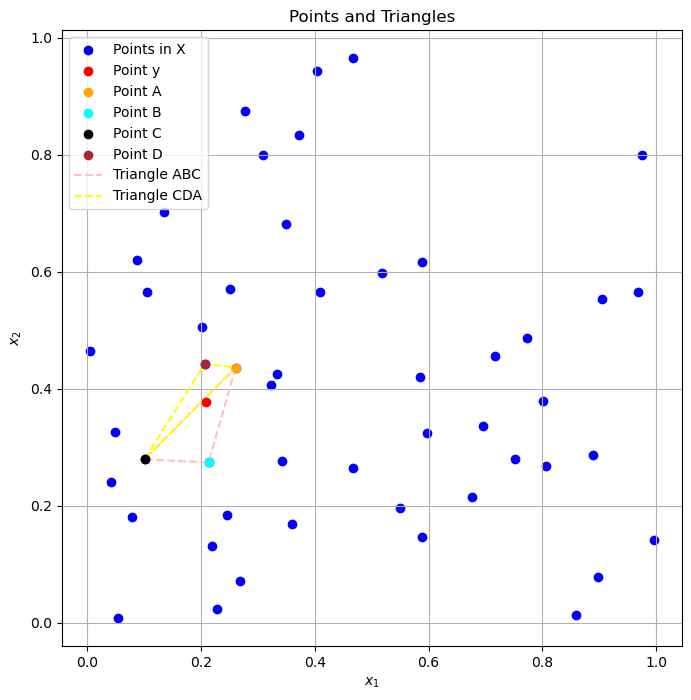

In [27]:
# Plot the points and triangles
model4.plot_point_and_tri()

As can be seen from the plot above, the point y graphically lies in triangle ABC.

**Question 2:** Compute the barycentric coordinates of the point $y$ with respect to the triangles $ABC$ and $CDA$. Which triangle is $y$ located inside?

The barycentric coordinates of point y wrt the triangles can be seen below. From the condition that barycentric coordinates have to be in the interval between 0 and 1, y lies in triangle ABC. The coordinates if it where to lie in CDA are also displayed.

In [28]:
# Check if the point y is inside any triangle, and which triangle that might be and get coordinates
result1 = model4.check_y_in_tri()

y in ABC with coordinates: [0.20901926 0.37774759]
Barycentric coordinates of ABC: (0.6286263152916166, 0.06910145494351515, 0.3022722297648682)
y not in CDA
Barycentric coordinates of CDA: (0.3682598757102867, -0.13392661883334067, 0.765666743123054)


**Question 3:** Compute the approximation of $f(y)$ using the full algorithm. Compare with the true value.

By applying the function we can compute the approximation of f(y) (barycentric interpolation). Furthermore, the true value is found for comparison.

In [29]:
# the approximation of f(y) and the true value of f(y) and the difference
f_y, true_value, diff_true = model4.approx_f()

y in ABC with coordinates: [0.20901926 0.37774759]
Barycentric coordinates of ABC: (0.6286263152916166, 0.06910145494351515, 0.3022722297648682)
y not in CDA
Barycentric coordinates of CDA: (0.3682598757102867, -0.13392661883334067, 0.765666743123054)
Approximation f(y): 0.08405201731052576
True value f(y): 0.0789565216259594
Difference: 0.005095495684566367


The difference noted above is a measure of the absolute difference between the aproximation and the true value. This indicates a measure of the error in the approximation which increases in magnitude the larger the difference is. The closer this is to zero, the higher the accuracy is for our approximation. With the difference  being  0.0051, we conclude that our approximation for f(y) is fairly accurate for the given sample.

**Question 4:** Repeat question 3 for all points in the set $Y$.

To find the approximations for the given set Y, we loop over values of y in the set. The results can be seen below (truncated). Notice that for the point $y=(0.8,0.8)$ the interpolation cannot be done as the point y does not lie in any triangle.

In [30]:
#display results for all points in Y
Y=[(0.2, 0.2), (0.8, 0.2), (0.8, 0.8), (0.8, 0.2), (0.5, 0.5)]
result4 = model4.func_4(Y)


Evaluating for y = (0.2, 0.2):
y in ABC with coordinates: [0.2 0.2]
Barycentric coordinates of ABC: (0.1805466701524854, 0.5826765149253863, 0.23677681492212832)
y not in CDA
Barycentric coordinates of CDA: (0.7507400810688765, -0.7794749222521683, 1.028734841183292)
Approximation f(y): 0.04032631372248057
True value f(y): 0.04000000000000001
Difference: 0.0003263137224805632

Evaluating for y = (0.8, 0.2):
y in ABC with coordinates: [0.8 0.2]
Barycentric coordinates of ABC: (0.5874166293573827, 0.2678463596528006, 0.14473701098981667)
y not in CDA
Barycentric coordinates of CDA: (0.4187612872222544, -1.5023945927888533, 2.083633305566599)
Approximation f(y): 0.15874233999349835
True value f(y): 0.16000000000000003
Difference: 0.0012576600065016819

Evaluating for y = (0.8, 0.8):
Approximation f(y): nan
True value f(y): 0.6400000000000001
Difference: nan

Evaluating for y = (0.8, 0.2):
y in ABC with coordinates: [0.8 0.2]
Barycentric coordinates of ABC: (0.5874166293573827, 0.26784635

Now we can look at the relative error for each point estimation by dividing the difference with the true value:

In [31]:
# Calculate the relative error
relative_error = model4.relative_error(result4)

# Create DataFrame for relative errors
relative_errors_df = pd.DataFrame(relative_error, columns=['Point', 'Relative Error'])

# Print relative errors
print(relative_errors_df)

        Point  Relative Error
0  (0.2, 0.2)          0.0082
1  (0.8, 0.2)          0.0079
2  (0.8, 0.8)             NaN
3  (0.8, 0.2)          0.0079
4  (0.5, 0.5)          0.0052


We see that for the point $y=(0.5,0.5)$ we obtain the lowest relative error of 0.52 percent. All points, with the exception of $y=(0.8,0.8)$ have low relative errors. Therefore, our method of interpolation is reliable for this data.